In [1]:
import torch
import os
import toml
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torchinfo import summary

In [2]:
from utils import (
    device,
    train_transforms,test_transforms,
    train,test,
    train_losses,test_losses,train_acc,test_acc
    )
from model import Net

/home/muthu/miniconda3/envs/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config = toml.load('config.toml')

In [4]:
DATAPATH:str = os.path.join(r"/home/muthu/GitHub/DATA 📁")

# Dataset
train_data = datasets.MNIST(DATAPATH, train=True, download=False, transform=train_transforms)
test_data = datasets.MNIST(DATAPATH, train=False, download=False, transform=test_transforms)

In [5]:
kwargs = {
    'batch_size': config['batch_size'],
    'shuffle'   : config['shuffle'],
    'num_workers':config['num_workers'],
    'pin_memory': config['pin_memory']
}

test_loader = torch.utils.data.DataLoader(test_data,**kwargs)
train_loader = torch.utils.data.DataLoader(train_data,**kwargs)

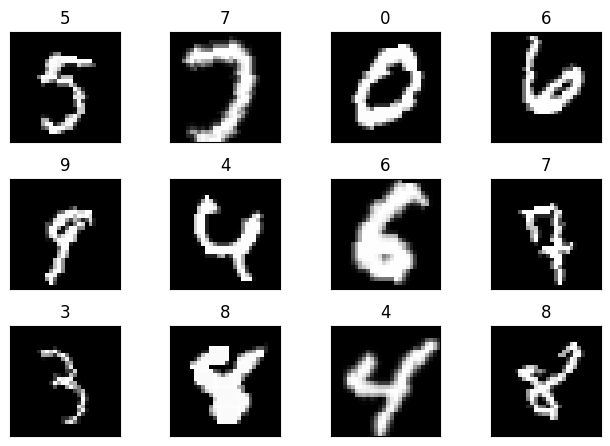

In [6]:
batch_data, batch_label = next(iter(train_loader)) 
fig = plt.figure()
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])
plt.show()

In [7]:
model = Net().to(device)

In [8]:
optimizer = torch.optim.SGD(
    model.parameters(), 
    lr=config['optimizer'].get('lr'), 
    momentum=config['optimizer'].get('momentum'),
)

scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer, 
    step_size=config['scheduler'].get('step_size') , 
    gamma=config['scheduler'].get('gamma'), 
    verbose=True
)

criterion = torch.nn.functional.nll_loss

/home/muthu/miniconda3/envs/venv/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [9]:
num_epochs = config['training'].get('num_epochs')

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Epoch 1


Train: Loss=0.0455 Batch_id=468 Accuracy=84.53: 100%|██████████| 469/469 [00:08<00:00, 57.21it/s] 


Test set: Average loss: 0.0625, Accuracy: 9803/10000 (98.03%)

Epoch 2


Train: Loss=0.0113 Batch_id=468 Accuracy=97.29: 100%|██████████| 469/469 [00:04<00:00, 99.79it/s] 


Test set: Average loss: 0.0365, Accuracy: 9884/10000 (98.84%)

Epoch 3


Train: Loss=0.0123 Batch_id=468 Accuracy=98.05: 100%|██████████| 469/469 [00:04<00:00, 100.80it/s]


Test set: Average loss: 0.0320, Accuracy: 9902/10000 (99.02%)

Epoch 4


Train: Loss=0.0086 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:04<00:00, 99.09it/s] 


Test set: Average loss: 0.0287, Accuracy: 9907/10000 (99.07%)

Epoch 5


Train: Loss=0.0600 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:04<00:00, 100.96it/s]


Test set: Average loss: 0.0237, Accuracy: 9922/10000 (99.22%)

Epoch 6


Train: Loss=0.0599 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:04<00:00, 99.57it/s] 


Test set: Average loss: 0.0285, Accuracy: 9913/10000 (99.13%)

Epoch 7


Train: Loss=0.0102 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:04<00:00, 101.14it/s]


Test set: Average loss: 0.0274, Accuracy: 9900/10000 (99.00%)

Epoch 8


Train: Loss=0.0515 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:04<00:00, 100.48it/s]


Test set: Average loss: 0.0204, Accuracy: 9933/10000 (99.33%)

Epoch 9


Train: Loss=0.0334 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:04<00:00, 100.14it/s]


Test set: Average loss: 0.0224, Accuracy: 9929/10000 (99.29%)

Epoch 10


Train: Loss=0.0302 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:04<00:00, 101.35it/s]


Test set: Average loss: 0.0246, Accuracy: 9926/10000 (99.26%)

Epoch 11


Train: Loss=0.0086 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:04<00:00, 99.44it/s] 


Test set: Average loss: 0.0217, Accuracy: 9926/10000 (99.26%)

Epoch 12


Train: Loss=0.0217 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:04<00:00, 98.90it/s] 


Test set: Average loss: 0.0208, Accuracy: 9931/10000 (99.31%)

Epoch 13


Train: Loss=0.0085 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:04<00:00, 98.93it/s] 


Test set: Average loss: 0.0208, Accuracy: 9926/10000 (99.26%)

Epoch 14


Train: Loss=0.0275 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:04<00:00, 100.24it/s]


Test set: Average loss: 0.0194, Accuracy: 9941/10000 (99.41%)

Epoch 15


Train: Loss=0.0010 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:04<00:00, 100.25it/s]


Test set: Average loss: 0.0200, Accuracy: 9935/10000 (99.35%)

Epoch 16


Train: Loss=0.0065 Batch_id=468 Accuracy=99.59: 100%|██████████| 469/469 [00:04<00:00, 99.75it/s] 


Test set: Average loss: 0.0164, Accuracy: 9944/10000 (99.44%)

Epoch 17


Train: Loss=0.0015 Batch_id=468 Accuracy=99.67: 100%|██████████| 469/469 [00:04<00:00, 99.76it/s] 


Test set: Average loss: 0.0163, Accuracy: 9947/10000 (99.47%)

Epoch 18


Train: Loss=0.0007 Batch_id=468 Accuracy=99.64: 100%|██████████| 469/469 [00:04<00:00, 99.75it/s] 


Test set: Average loss: 0.0159, Accuracy: 9945/10000 (99.45%)

Epoch 19


Train: Loss=0.0193 Batch_id=468 Accuracy=99.65: 100%|██████████| 469/469 [00:04<00:00, 100.04it/s]


Test set: Average loss: 0.0164, Accuracy: 9946/10000 (99.46%)

Epoch 20


Train: Loss=0.0065 Batch_id=468 Accuracy=99.69: 100%|██████████| 469/469 [00:04<00:00, 99.84it/s] 


Test set: Average loss: 0.0170, Accuracy: 9948/10000 (99.48%)



Text(0.5, 1.0, 'Test Accuracy')

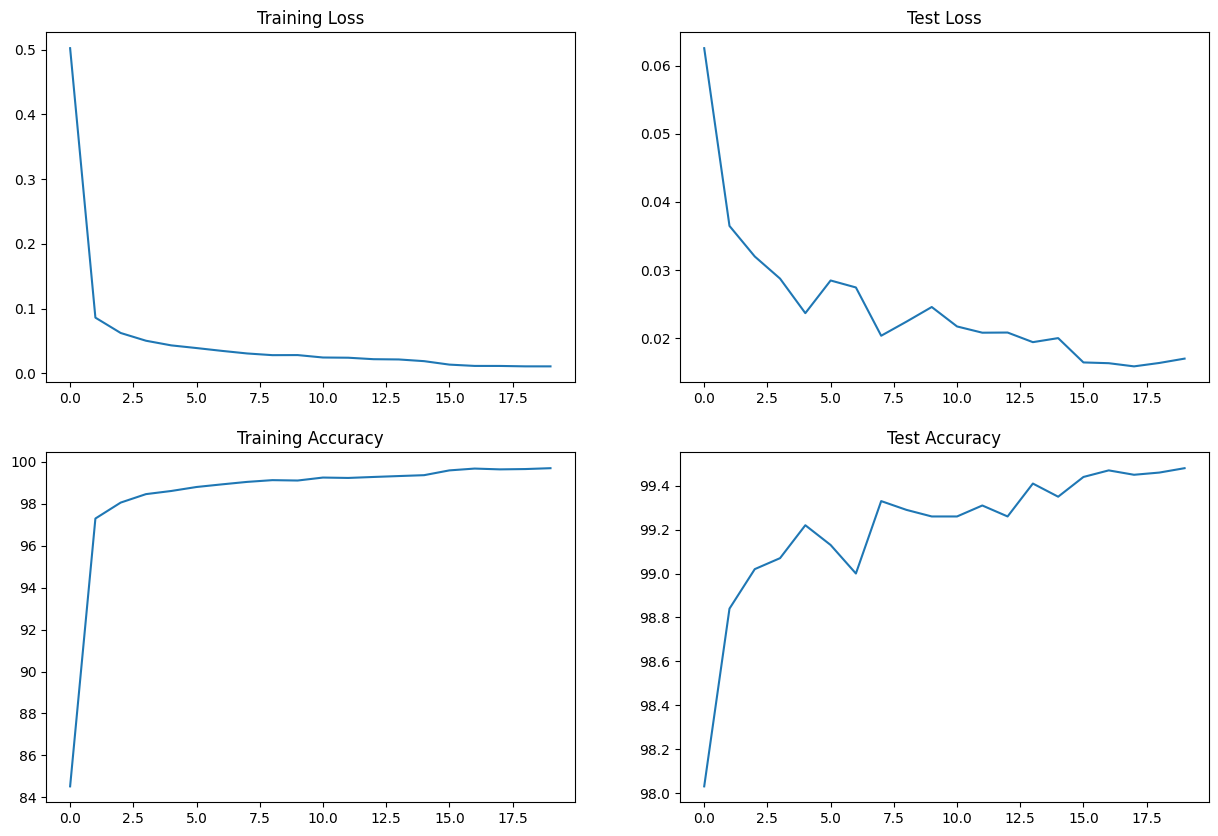

In [10]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [11]:
summary(model, input_size=(1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1, 10]                   --
├─Conv2d: 1-1                            [32, 26, 26]              320
├─Conv2d: 1-2                            [64, 24, 24]              18,496
├─Conv2d: 1-3                            [128, 10, 10]             73,856
├─Conv2d: 1-4                            [256, 8, 8]               295,168
├─Linear: 1-5                            [1, 50]                   204,850
├─Linear: 1-6                            [1, 10]                   510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 727.92
Input size (MB): 0.00
Forward/backward pass size (MB): 0.70
Params size (MB): 2.37
Estimated Total Size (MB): 3.08